### Amazon Review for Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from textblob import Word
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("vader_lexicon")

import warnings 
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv('amazon_reviews.csv')
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


### Data Exploration and Pre-processing


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [4]:
df.shape

(4915, 12)

In [5]:
# Checking for missing values
df.isna().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [6]:
# Dropping missing values
df.dropna(inplace=True)
df.isna().sum()

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [7]:
df.shape

(4913, 12)

In [8]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,4913.0,4.587625,0.996995,1.0,5.0,5.0,5.0,5.000000
day_diff,4913.0,437.346224,209.360537,1.0,281.0,431.0,601.0,1064.000000
helpful_yes,4913.0,1.311215,41.627627,0.0,0.0,0.0,0.0,1952.000000
helpful_no,4913.0,0.210258,4.024098,0.0,0.0,0.0,0.0,183.000000
total_vote,4913.0,1.521474,44.132066,0.0,0.0,0.0,0.0,2020.000000
score_pos_neg_diff,4913.0,1.100957,39.375960,-130.0,0.0,0.0,0.0,1884.000000
score_average_rating,4913.0,0.075363,0.255973,0.0,0.0,0.0,0.0,1.000000
wilson_lower_bound,4913.0,0.020019,0.077156,0.0,0.0,0.0,0.0,0.957544


### Exploratory Data Analysis 

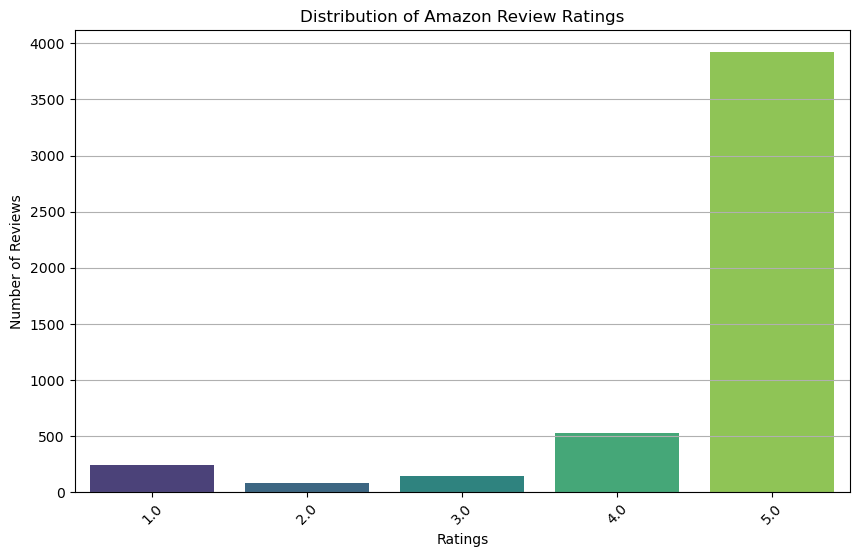

(None,
 1.0     244
 2.0      80
 3.0     142
 4.0     526
 5.0    3921
 Name: overall, dtype: int64)

In [10]:
# Summary of the distribution of ratings
rating_counts = df['overall'].value_counts().sort_index()

# Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")
plt.title("Distribution of Amazon Review Ratings")
plt.xlabel("Ratings")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show(), rating_counts

From the bar chart and the counts, we can observe that:

* The majority of the reviews are highly positive, with 5-star ratings being the most common.
* There's a clear skew towards higher ratings, indicating overall positive feedback.
* Lower ratings (1 and 2 stars) are relatively rare in comparison to higher ratings.

This distribution suggests that customers are generally satisfied with the products, or it could indicate a tendency for customers to leave reviews primarily when they have a positive experience.

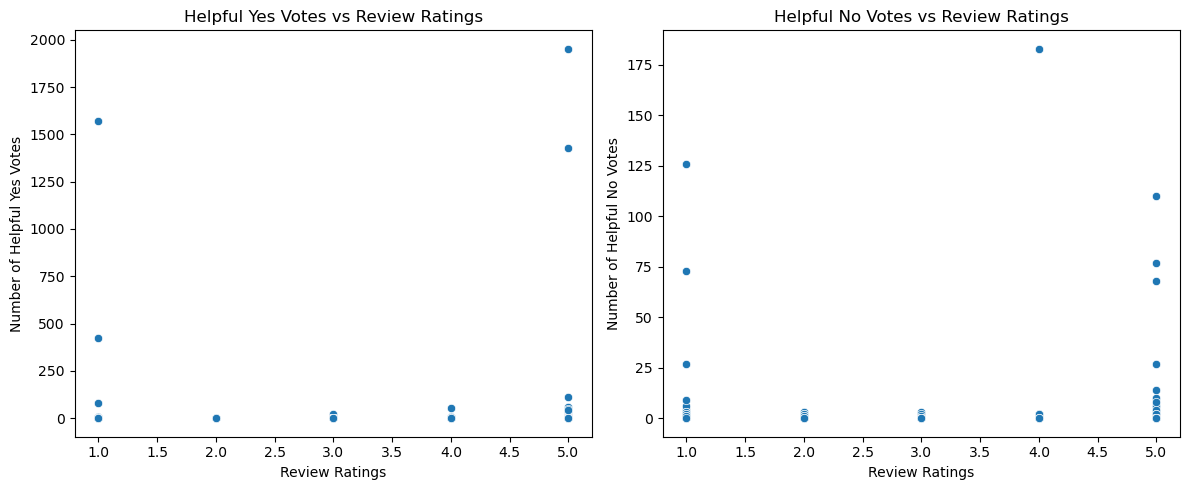

In [11]:
# Correlation analysis
correlation_data = df[['overall', 'helpful_yes', 'helpful_no']].corr()

# Scatter plot for 'helpful_yes' vs 'overall'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='overall', y='helpful_yes', data= df)
plt.title('Helpful Yes Votes vs Review Ratings')
plt.xlabel('Review Ratings')
plt.ylabel('Number of Helpful Yes Votes')

# Scatter plot for 'helpful_no' vs 'overall'
plt.subplot(1, 2, 2)
sns.scatterplot(x='overall', y='helpful_no', data=df)
plt.title('Helpful No Votes vs Review Ratings')
plt.xlabel('Review Ratings')
plt.ylabel('Number of Helpful No Votes')

plt.tight_layout()
plt.show()

To examine the relationship between helpful votes and review ratings, we can analyze how the number of helpful votes (both "yes" and "no") varies with the review ratings. This can give us insights into whether certain ratings are perceived as more helpful by other users.

We'll look at this relationship in two ways:

1. Correlation Analysis: To understand if there's a linear relationship between the number of helpful votes and the ratings.
2. Visual Analysis: Creating scatter plots or other visualizations to observe patterns or trends between these variables.

For the purpose of this analysis, we'll consider the `helpful_yes` and `helpful_no` columns in relation to the `overall` rating column. Let's start with the correlation analysis and then move on to the visual representation.

**Scatter Plots Analysis**
* The scatter plot for "Helpful Yes Votes vs Review Ratings" doesn't show a clear trend or pattern, indicating that the number of helpful 'yes' votes doesn't significantly vary with the review ratings.
* Similarly, the scatter plot for "Helpful No Votes vs Review Ratings" also does not show any significant trends.

In [12]:
correlation_data

,overall,helpful_yes,helpful_no
overall,1.00000,-0.031220,-0.066170
helpful_yes,-0.03122,1.000000,0.592747
helpful_no,-0.06617,0.592747,1.000000


**Correlation Analysis**
* The correlation between `overall` ratings and `helpful_yes` is −0.031, indicating a very weak negative relationship.
* The correlation between `overall` ratings and `helpful_no` is −0.066, also indicating a very weak negative relationship.
* There is a moderate positive correlation (0.593) between `helpful_yes` and `helpful_no`, suggesting that reviews which get many 'yes' votes also tend to get a fair number of 'no' votes.

**Interpretation**
* The very weak negative correlations suggest that higher-rated reviews do not necessarily receive more helpful votes, whether 'yes' or 'no'.
* The absence of a strong pattern in the scatter plots supports this conclusion.
* The moderate positive correlation between 'helpful_yes' and 'helpful_no' could indicate that reviews with more engagement (votes) tend to attract both types of votes.

These findings suggest that the perceived helpfulness of a review, as indicated by 'yes' and 'no' votes, is not strongly influenced by the rating given in the review. This could imply that users consider factors other than the rating itself when judging the helpfulness of a review.

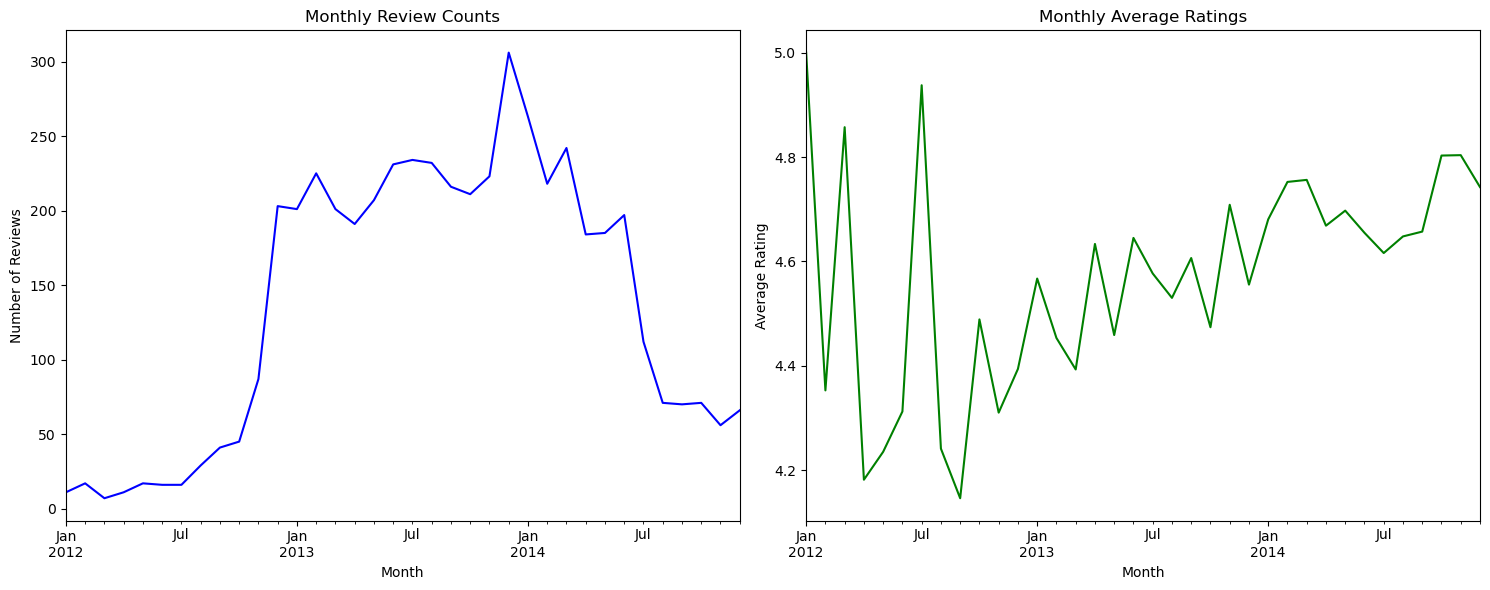

In [13]:
# Convert 'reviewTime' to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Setting the index to 'reviewTime' for easier time-based analysis
amazon_reviews_time_indexed = df.set_index('reviewTime')

# Resampling the data on a monthly basis
# Count of reviews per month
monthly_review_count = amazon_reviews_time_indexed['overall'].resample('M').count()

# Average rating per month
monthly_average_rating = amazon_reviews_time_indexed['overall'].resample('M').mean()

# Plotting the trend of review counts and average ratings over time
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
monthly_review_count.plot(title='Monthly Review Counts', color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')

plt.subplot(1, 2, 2)
monthly_average_rating.plot(title='Monthly Average Ratings', color='green')
plt.xlabel('Month')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

1. Monthly Review Counts: This graph shows the number of reviews posted each month. We observe some fluctuations over time. To gain more insights, identifying specific peaks or declines could be correlated with external events like product launches or holiday seasons.

2. Monthly Average Ratings: This graph represents the average rating given each month. The trend here appears relatively stable, with some variation. It's interesting to note that despite the fluctuation in the number of reviews, the average rating seems to remain consistent over time.

These trends can provide valuable insights, especially when linked with external factors like marketing campaigns, product changes, or seasonal effects. For a more detailed analysis, identifying key dates and correlating them with these trends could be beneficial.

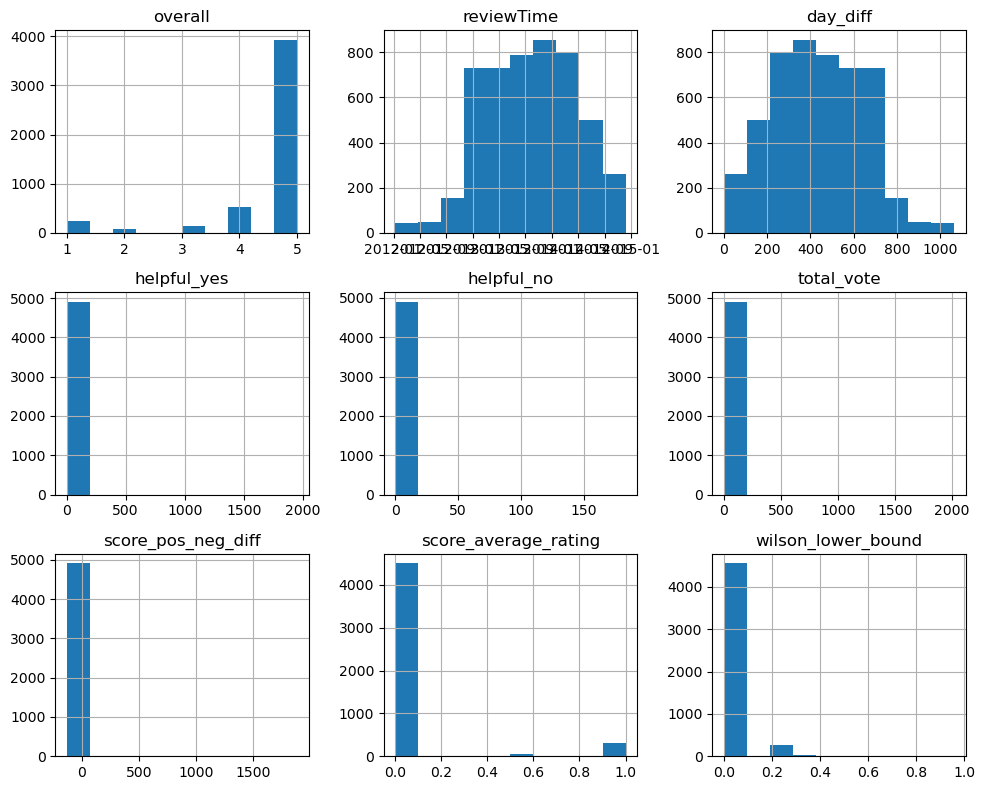

In [14]:
# Plot histograms of numeric variables
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [15]:
df.head(2)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0


In [16]:
df1 = df.copy()
df1.head(2)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0


In [17]:
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "Positive"
    elif label == 3.0:
        return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "Negative"

df1['overall'] = df1["overall"].apply(sentiment)
df1.head(2)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,0mie,Positive,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,Positive,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0


In [18]:
df1 = df1[['reviewText', 'overall']].dropna()
df1.head()

,reviewText,overall
1,"Purchased this for my device, it worked as adv...",Positive
2,it works as expected. I should have sprung for...,Positive
3,This think has worked out great.Had a diff. br...,Positive
4,"Bought it with Retail Packaging, arrived legit...",Positive
5,It's mini storage. It doesn't do anything els...,Positive


<Axes: >

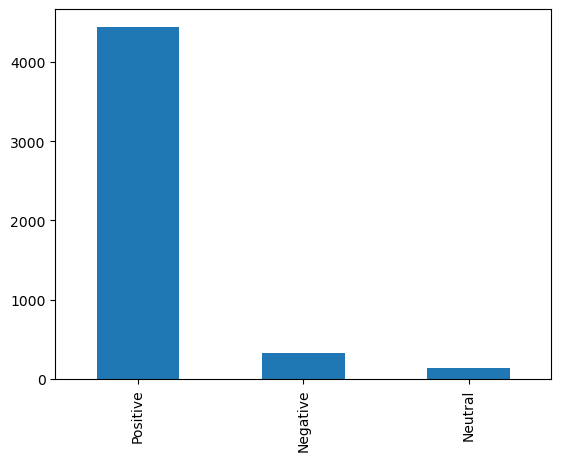

In [19]:
df1.overall.value_counts().plot(kind = "bar")

### Text Processing

In [20]:
def text_preprocessing(dataframe, dependent_var):
  # Normalizing Case Folding - Uppercase to Lowercase
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

  # Removing Punctuation
  dataframe[dependent_var] = dataframe[dependent_var].str.replace('[^\w\s]','')

  # Removing Numbers
  dataframe[dependent_var] = dataframe[dependent_var].str.replace('\d','')

  # StopWords
  sw = stopwords.words('english')
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

  # Remove Rare Words
  temp_df = pd.Series(' '.join(dataframe[dependent_var]).split()).value_counts()
  drops = temp_df[temp_df <= 1]
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x for x in str(x).split() if x not in drops))

  # Lemmatize
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

  return dataframe

### Text Visualization

In [21]:
def text_visulaization(dataframe, dependent_var, barplot=True, wordcloud=True):
  # Calculation of Term Frequencies
  tf = dataframe[dependent_var].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
  tf.columns = ["words", "tf"]

  if barplot:
    # Bar Plot
    tf[tf["tf"]>1000].plot.barh(x="words", y="tf")
    plt.title("Calculation of Term Frequencies : barplot")
    plt.show()

  if wordcloud:
    # WordCloud
    text = " ".join(i for i in dataframe[dependent_var])
    wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white").generate(text)
    plt.figure(figsize=[10, 10])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Calculation of Term Frequencies : wordcloud")
    plt.show()
    wordcloud.to_file("wordcloud.png")

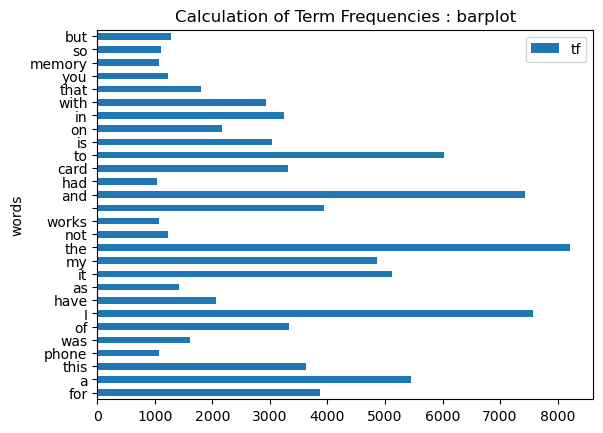

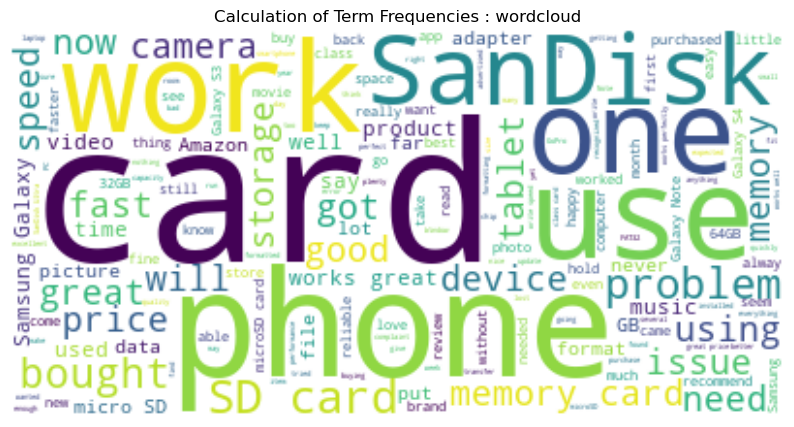

In [22]:
text_visulaization(df1, "reviewText")

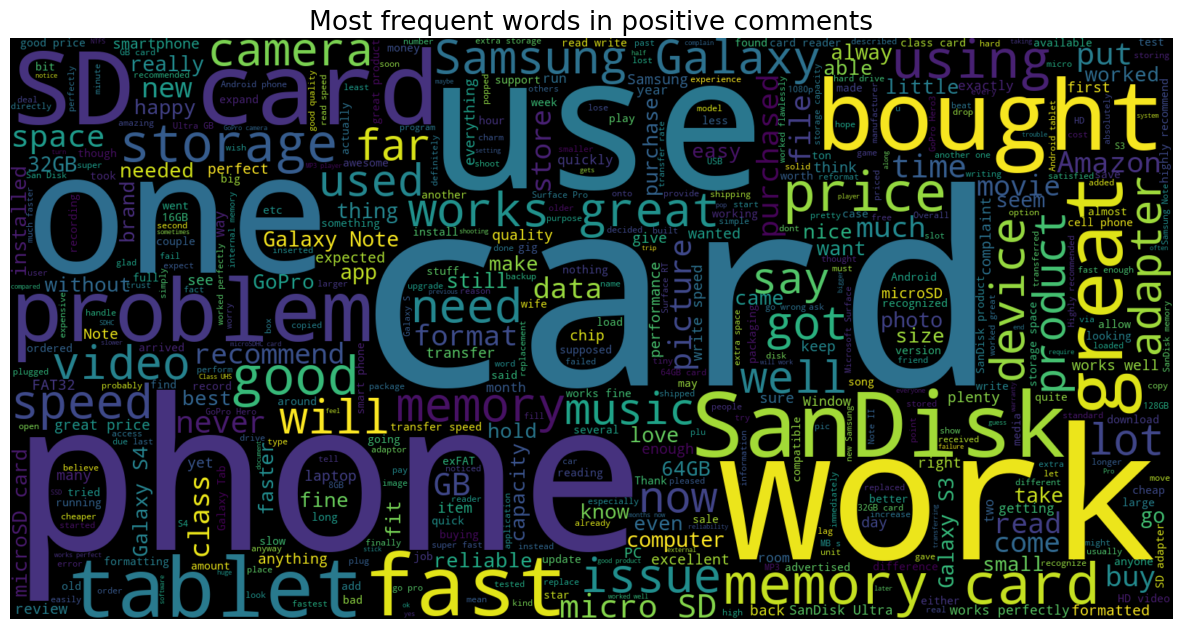

In [23]:
pos_comments = df1[df1.overall == 'Positive']

text = ' '.join([word for word in pos_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive comments', fontsize=19)
plt.show()

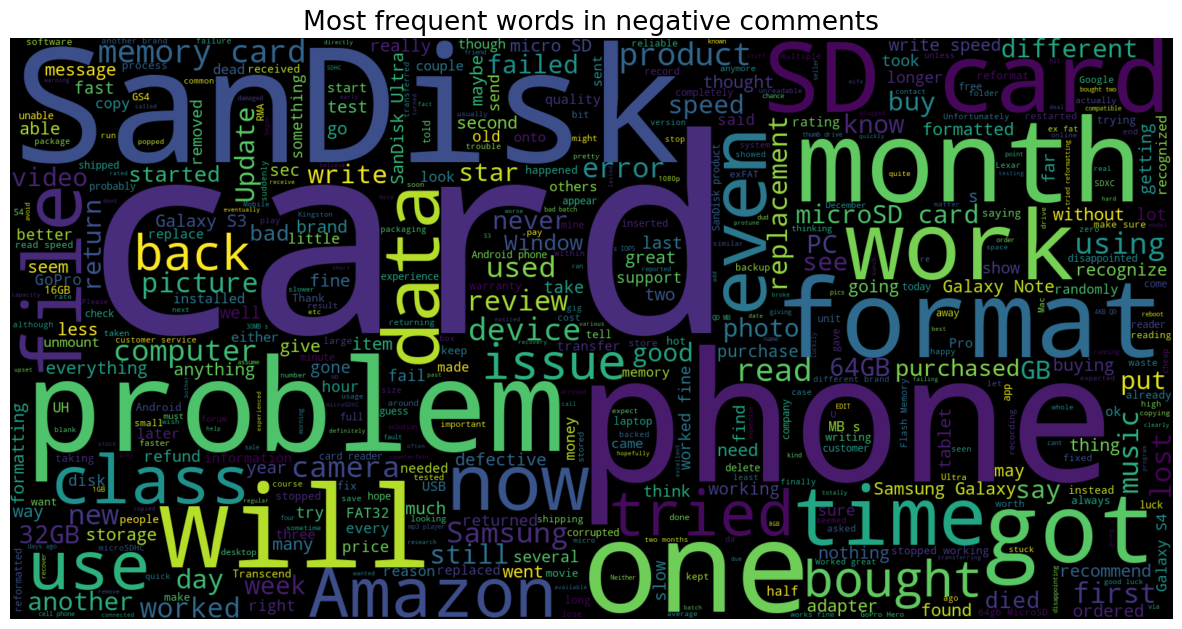

In [24]:
neg_comments = df1[df1.overall == 'Negative']

text = ' '.join([word for word in neg_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative comments', fontsize=19)
plt.show()

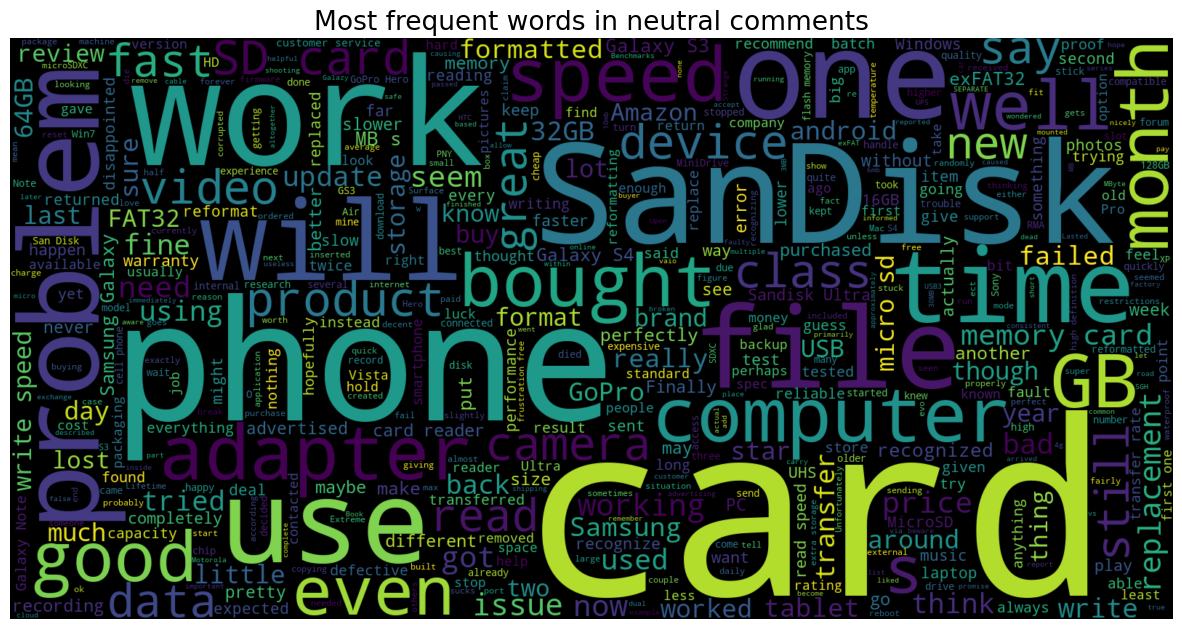

In [25]:
neu_comments = df1[df1.overall == 'Neutral']

text = ' '.join([word for word in neu_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral comments', fontsize=19)
plt.show()

### Feature Engineering

In [26]:
# Feature engineering function
def feature_engineering_amazon(df):
    # Fill missing values in 'reviewText' with an empty string
    df['reviewText'].fillna('', inplace=True)

    # Create a new feature 'review_length' representing the length of each review
    df['review_length'] = df['reviewText'].apply(lambda x: len(x.split()))

    return df

# Apply feature engineering
df = feature_engineering_amazon(df)

# Display the modified DataFrame with the new feature
print("\nDataFrame after Feature Engineering:")
print(df.head())


DataFrame after Feature Engineering:
   reviewerName  overall                                         reviewText  \
1          0mie      5.0  Purchased this for my device, it worked as adv...   
2           1K3      4.0  it works as expected. I should have sprung for...   
3           1m2      5.0  This think has worked out great.Had a diff. br...   
4  2&amp;1/2Men      5.0  Bought it with Retail Packaging, arrived legit...   
5       2Cents!      5.0  It's mini storage.  It doesn't do anything els...   

  reviewTime  day_diff  helpful_yes  helpful_no  total_vote  \
1 2013-10-25       409            0           0           0   
2 2012-12-23       715            0           0           0   
3 2013-11-21       382            0           0           0   
4 2013-07-13       513            0           0           0   
5 2013-04-29       588            0           0           0   

   score_pos_neg_diff  score_average_rating  wilson_lower_bound  review_length  
1                   0      

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from textblob import TextBlob
from sklearn.decomposition import PCA
import pandas as pd

# Feature engineering function
def feature_engineering_amazon(df):
    # Fill missing values in 'reviewText' with an empty string
    df['reviewText'].fillna('', inplace=True)

    # Create a new feature 'review_length' representing the length of each review (number of words)
    df['review_length'] = df['reviewText'].apply(lambda x: len(x.split()))

    # Extract numerical features from 'reviewText' using TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['reviewText'])
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

    # Concatenate the original DataFrame with the TF-IDF features
    df = pd.concat([df, tfidf_df], axis=1)

    # Sentiment Analysis using TextBlob (handling NaN values)
    df['polarity'] = df['reviewText'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    df['subjectivity'] = df['reviewText'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

    # Apply PCA to reduce dimensionality of TF-IDF features
    pca = PCA(n_components=5)  # Choose the number of components based on domain knowledge or experimentation
    tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())
    tfidf_pca_df = pd.DataFrame(tfidf_pca, columns=[f'tfidf_pca_{i}' for i in range(1, 6)])
    
    # Concatenate the original DataFrame with the PCA-transformed TF-IDF features
    df = pd.concat([df, tfidf_pca_df], axis=1)

    # Standardize numerical features using StandardScaler
    numerical_features = ['review_length', 'polarity', 'subjectivity'] + list(tfidf_df.columns) + list(tfidf_pca_df.columns)
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    return df

# Apply feature engineering
df = feature_engineering_amazon(df)

# Display the modified DataFrame with the new features
print("\nDataFrame after Feature Engineering:")
print(df.head())


DataFrame after Feature Engineering:
   reviewerName   overall                                         reviewText  \
1          0mie  0.413660  Purchased this for my device, it worked as adv...   
2           1K3 -0.589456  it works as expected. I should have sprung for...   
3           1m2  0.413660  This think has worked out great.Had a diff. br...   
4  2&amp;1/2Men  0.413660  Bought it with Retail Packaging, arrived legit...   
5       2Cents!  0.413660  It's mini storage.  It doesn't do anything els...   

  reviewTime  day_diff  helpful_yes  helpful_no  total_vote  \
1 2013-10-25     409.0          0.0         0.0         0.0   
2 2012-12-23     715.0          0.0         0.0         0.0   
3 2013-11-21     382.0          0.0         0.0         0.0   
4 2013-07-13     513.0          0.0         0.0         0.0   
5 2013-04-29     588.0          0.0         0.0         0.0   

   score_pos_neg_diff  score_average_rating  ...     years       yes  \
1                 0.0         

In [28]:
from sklearn.preprocessing import StandardScaler

# Feature engineering function
def feature_engineering_amazon(df):
    # Fill missing values in 'reviewText' with an empty string
    df['reviewText'].fillna('', inplace=True)

    # Create a new feature 'review_length' representing the length of each review (number of words)
    df['review_length'] = df['reviewText'].apply(lambda x: len(x.split()))

    # Extract numerical features from 'reviewText' using TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['reviewText'])
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    
    # Concatenate the original DataFrame with the TF-IDF features
    df = pd.concat([df, tfidf_df], axis=1)

    # Standardize numerical features using StandardScaler
    numerical_features = ['review_length'] + list(tfidf_df.columns)
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    return df

# Apply feature engineering
df = feature_engineering_amazon(df)

# Display the modified DataFrame with the new features
print("\nDataFrame after Feature Engineering:")
print(df.head())


DataFrame after Feature Engineering:
   reviewerName   overall                                         reviewText  \
1          0mie  0.413660  Purchased this for my device, it worked as adv...   
2           1K3 -0.589456  it works as expected. I should have sprung for...   
3           1m2  0.413660  This think has worked out great.Had a diff. br...   
4  2&amp;1/2Men  0.413660  Bought it with Retail Packaging, arrived legit...   
5       2Cents!  0.413660  It's mini storage.  It doesn't do anything els...   

  reviewTime  day_diff  helpful_yes  helpful_no  total_vote  \
1 2013-10-25     409.0          0.0         0.0         0.0   
2 2012-12-23     715.0          0.0         0.0         0.0   
3 2013-11-21     382.0          0.0         0.0         0.0   
4 2013-07-13     513.0          0.0         0.0         0.0   
5 2013-04-29     588.0          0.0         0.0         0.0   

   score_pos_neg_diff  score_average_rating  ...     write    writes  \
1                 0.0         

In [29]:
import nltk

# Download the punkt resource
nltk.download('punkt')


# Feature engineering function
def feature_engineering_amazon(df):
    # Fill missing values in 'reviewText' with an empty string
    df['reviewText'].fillna('', inplace=True)

    # Create a new feature 'word_count' representing the number of words in each review
    df['word_count'] = df['reviewText'].apply(lambda x: len(nltk.word_tokenize(x)))

    # Create a new feature 'character_count' representing the number of characters in each review
    df['character_count'] = df['reviewText'].apply(lambda x: len(x))

    # Create a new feature 'average_word_length' representing the average length of words in each review
    df['average_word_length'] = df.apply(lambda row: row['character_count'] / row['word_count'] if row['word_count'] > 0 else 0, axis=1)

    # Extract numerical features from 'reviewText' using TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords.words('english'))
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['reviewText'])
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    
    # Concatenate the original DataFrame with the new features and TF-IDF features
    df = pd.concat([df, tfidf_df], axis=1)

    return df

# Apply feature engineering
df = feature_engineering_amazon(df)

# Display the modified DataFrame with the new features
print("\nDataFrame after Feature Engineering:")
print(df.head())

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



DataFrame after Feature Engineering:
   reviewerName   overall                                         reviewText  \
1          0mie  0.413660  Purchased this for my device, it worked as adv...   
2           1K3 -0.589456  it works as expected. I should have sprung for...   
3           1m2  0.413660  This think has worked out great.Had a diff. br...   
4  2&amp;1/2Men  0.413660  Bought it with Retail Packaging, arrived legit...   
5       2Cents!  0.413660  It's mini storage.  It doesn't do anything els...   

  reviewTime  day_diff  helpful_yes  helpful_no  total_vote  \
1 2013-10-25     409.0          0.0         0.0         0.0   
2 2012-12-23     715.0          0.0         0.0         0.0   
3 2013-11-21     382.0          0.0         0.0         0.0   
4 2013-07-13     513.0          0.0         0.0         0.0   
5 2013-04-29     588.0          0.0         0.0         0.0   

   score_pos_neg_diff  score_average_rating  ...  writes  writing  written  \
1                 0.0   

In [75]:
# Feature engineering function
def feature_engineering_word_char_count(df):
    # Fill missing values in 'reviewText' with an empty string
    df['reviewText'].fillna('', inplace=True)

    # Create a new feature 'word_count' representing the number of words in each review
    df['word_count'] = df['reviewText'].apply(lambda x: len(x.split()))

    # Create a new feature 'char_count' representing the number of characters in each review
    df['char_count'] = df['reviewText'].apply(lambda x: len(x))

    return df

# Apply feature engineering
df = feature_engineering_word_char_count(df)

# Display the modified DataFrame with the new features
print("\nDataFrame after Word and Character Count Feature Engineering:")
print(df.head())


DataFrame after Word and Character Count Feature Engineering:
   reviewerName   overall                                         reviewText  \
1          0mie  0.413660  Purchased this for my device, it worked as adv...   
2           1K3 -0.589456  it works as expected. I should have sprung for...   
3           1m2  0.413660  This think has worked out great.Had a diff. br...   
4  2&amp;1/2Men  0.413660  Bought it with Retail Packaging, arrived legit...   
5       2Cents!  0.413660  It's mini storage.  It doesn't do anything els...   

  reviewTime  day_diff  helpful_yes  helpful_no  total_vote  \
1 2013-10-25     409.0          0.0         0.0         0.0   
2 2012-12-23     715.0          0.0         0.0         0.0   
3 2013-11-21     382.0          0.0         0.0         0.0   
4 2013-07-13     513.0          0.0         0.0         0.0   
5 2013-04-29     588.0          0.0         0.0         0.0   

   score_pos_neg_diff  score_average_rating  ...  written  wrong   xc  year  

In [31]:
# Create Lables
def create_label(dataframe, dependent_var, independent_var):
  sia = SentimentIntensityAnalyzer()
  dataframe[independent_var] = dataframe[dependent_var].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
  dataframe[independent_var] = LabelEncoder().fit_transform(dataframe[independent_var])

  X = dataframe[dependent_var]
  y = dataframe[independent_var]

  return X, y

In [32]:
def create_features_count(train_x, test_x):
  # Count Vectors
  vectorizer = CountVectorizer()
  x_train_count_vectorizer = vectorizer.fit_transform(train_x)
  x_test_count_vectorizer = vectorizer.fit_transform(test_x)

  return x_train_count_vectorizer, x_test_count_vectorizer

### Model Selection and Training

In [33]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df1['reviewText'])

X = df1['reviewText']
y = df1['overall']
X = vect.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Size of x_train:',(X_train.shape))
print('Size of y_train:',(y_train.shape))
print('Size of x_test:',(X_test.shape))
print('Size of y_test:',(y_test.shape))

Size of x_train: (3930, 87172)
Size of y_train: (3930,)
Size of x_test: (983, 87172)
Size of y_test: (983,)


In [74]:
def train_model(model): 
    #create a pipeline with CountVectorizer and Naive Bayes Classifier 
    model = make_pipeline(CountVectorizer(), model)
    
    #train the model
    model.fit(X_train_preprocessed, y_train)
    
    #Evaluate the model on testing set 
    y_pred = model.predict(X_test_preprocessed)
    return model, y_pred

### Logistic Regression



In [34]:
# Create a Logistic Regression object
logreg = LogisticRegression()

# Train the classifier on the training set
logreg.fit(X_train,y_train)

# Predict the sentiment of the test set
logreg_pred = logreg.predict(X_test)

# Evaluate the classifier's performance on the test set
logreg_acc = accuracy_score(logreg_pred,y_test)
print('Test accuracy : {:.2f}%'.format(logreg_acc*100))

Test accuracy : 92.78%


In [35]:
# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, logreg_pred))

[[ 30   4  34]
 [  3   0  22]
 [  5   3 882]]


In [36]:
# Print the classification report
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

    Negative       0.79      0.44      0.57        68
     Neutral       0.00      0.00      0.00        25
    Positive       0.94      0.99      0.96       890

    accuracy                           0.93       983
   macro avg       0.58      0.48      0.51       983
weighted avg       0.91      0.93      0.91       983



### Decision Tree classifier 

In [37]:
# Create a Decision Tree Classifier object
dt_class = DecisionTreeClassifier()

# Train the classifier on the training set
dt_class.fit(X_train,y_train)

# Predict the sentiment of the test set
dt_pred = dt_class.predict(X_test)

# Evaluate the classifier's performance on the test set
dt_acc = accuracy_score(dt_pred,y_test)
print('Test accuracy : {:.2f}%'.format(dt_acc*100))

Test accuracy : 89.22%


In [38]:
# Print the confusion matrix of the dt_class model
print(confusion_matrix(y_test, dt_pred))

[[ 24   5  39]
 [  6   0  19]
 [ 27  10 853]]


In [39]:
# Print the classification report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

    Negative       0.42      0.35      0.38        68
     Neutral       0.00      0.00      0.00        25
    Positive       0.94      0.96      0.95       890

    accuracy                           0.89       983
   macro avg       0.45      0.44      0.44       983
weighted avg       0.88      0.89      0.88       983



### Random Forest Classifier 

In [40]:
# Create a Random Forest Classifier object
rf_class = RandomForestClassifier()

# Train the classifier on the training set
rf_class.fit(X_train,y_train)

# Predict the sentiment of the test set
rf_pred = rf_class.predict(X_test)

# Evaluate the classifier's performance on the test set
rf_acc = accuracy_score(rf_pred,y_test)
print('Test accuracy : {:.2f}%'.format(rf_acc*100))

Test accuracy : 90.44%


In [41]:
# Print the confusion matrix of the rf_class model
print(confusion_matrix(y_test, rf_pred))

[[  0   0  68]
 [  0   0  25]
 [  1   0 889]]


In [42]:
# Print the classification report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        68
     Neutral       0.00      0.00      0.00        25
    Positive       0.91      1.00      0.95       890

    accuracy                           0.90       983
   macro avg       0.30      0.33      0.32       983
weighted avg       0.82      0.90      0.86       983



### AdaBoost Classifier

In [43]:
# Create a AdaBoost Classifier object
ada_class = AdaBoostClassifier()

# Train the classifier on the training set
ada_class.fit(X_train,y_train)

# Predict the sentiment of the test set
ada_pred = ada_class.predict(X_test)

# Evaluate the classifier's performance on the test set
ada_acc = accuracy_score(ada_pred,y_test)
print('Test accuracy : {:.2f}%'.format(ada_acc*100))

Test accuracy : 90.54%


In [44]:
# Print the confusion matrix of the ada_class model
print(confusion_matrix(y_test, ada_pred))

[[ 22   4  42]
 [  1   0  24]
 [ 15   7 868]]


In [45]:
# Print the classification report
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

    Negative       0.58      0.32      0.42        68
     Neutral       0.00      0.00      0.00        25
    Positive       0.93      0.98      0.95       890

    accuracy                           0.91       983
   macro avg       0.50      0.43      0.46       983
weighted avg       0.88      0.91      0.89       983



### Gradient Boosting Classifier

In [46]:
# Create a Gradient Boosting Classifier object
gb_class = GradientBoostingClassifier()

# Train the classifier on the training set
gb_class.fit(X_train,y_train)

# Predict the sentiment of the test set
gb_pred = gb_class.predict(X_test)

# Evaluate the classifier's performance on the test set
gb_acc = accuracy_score(gb_pred,y_test)
print('Test accuracy : {:.2f}%'.format(gb_acc*100))

Test accuracy : 91.05%


In [47]:
# Print the confusion matrix of the gb_class model
print(confusion_matrix(y_test, gb_pred))

[[ 14   4  50]
 [  1   1  23]
 [  8   2 880]]


In [48]:
# Print the classification report
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

    Negative       0.61      0.21      0.31        68
     Neutral       0.14      0.04      0.06        25
    Positive       0.92      0.99      0.95       890

    accuracy                           0.91       983
   macro avg       0.56      0.41      0.44       983
weighted avg       0.88      0.91      0.89       983



### Linear Support Vector Classifier

In [49]:
# Create a LinearSVC object
SVC_model = LinearSVC()

# Train the classifier on the training set
SVC_model.fit(X_train,y_train)

# Predict the sentiment of the test set
SVC_pred = SVC_model.predict(X_test)

# Evaluate the classifier's performance on the test set
SVC_acc = accuracy_score(SVC_pred,y_test)
print('Test accuracy : {:.2f}%'.format(SVC_acc*100))

Test accuracy : 93.18%


In [50]:
# Print the confusion matrix of the SVC_model
print(confusion_matrix(y_test, SVC_pred))

[[ 33   5  30]
 [  4   1  20]
 [  5   3 882]]


In [51]:
# Print the classification report
print(classification_report(y_test, SVC_pred))

              precision    recall  f1-score   support

    Negative       0.79      0.49      0.60        68
     Neutral       0.11      0.04      0.06        25
    Positive       0.95      0.99      0.97       890

    accuracy                           0.93       983
   macro avg       0.61      0.51      0.54       983
weighted avg       0.91      0.93      0.92       983



### Naive Bayes Classifier

In [52]:
# Create a Naive Bayes classifier object
classifier = MultinomialNB()

# Train the classifier on the training set
classifier.fit(X_train, y_train)

# Predict the sentiment of the test set
predictions = classifier.predict(X_test)

# Evaluate the classifier's performance on the test set
accuracy = accuracy_score(predictions, y_test)
print('Test accuracy : {:.2f}%'.format(accuracy*100))

Test accuracy : 90.74%


In [53]:
# Print the confusion matrix of the classifier
print(confusion_matrix(y_test, predictions))

[[ 11   0  57]
 [  1   0  24]
 [  7   2 881]]


In [54]:
# Print the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    Negative       0.58      0.16      0.25        68
     Neutral       0.00      0.00      0.00        25
    Positive       0.92      0.99      0.95       890

    accuracy                           0.91       983
   macro avg       0.50      0.38      0.40       983
weighted avg       0.87      0.91      0.88       983



### Hyperparameter Tuning 

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Assuming you have NLTK installed, download the required model data
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
# Preprocess the data and perform sentiment analysis
sia = SentimentIntensityAnalyzer()
df["polarity_score"] = df['reviewText'].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df["polarity_score"] = LabelEncoder().fit_transform(df["polarity_score"])

In [57]:
# Split the data into features (X) and target variable (y)
X = df['reviewText']
y = df["polarity_score"]

In [58]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=45)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=45)

In [59]:
# Define the model
model = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [60]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [61]:
# Define the hyperparameter grid for Logistic Regression
param_grid = {'C': [0.001, 0.01, 1, 10]}


In [62]:
# Create a Logistic Regression object
logreg = LogisticRegression()


In [63]:
# Use GridSearchCV for hyperparameter tuning
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 10]}, scoring='accuracy')

In [64]:
# Get the best hyperparameters
best_params = grid.best_params_

# Train the best model on the entire training set
best_model = grid.best_estimator_
best_model.fit(X_train_tfidf, y_train)


LogisticRegression(C=10)

In [65]:
print("Best parameters : ", grid.best_params_)

Best parameters :  {'C': 10}


In [66]:
# Predict the sentiment of the test set
logreg_pred = best_model.predict(X_test_tfidf)

# Evaluate the classifier's performance on the test set
logreg_acc = accuracy_score(logreg_pred, y_test)
print('Test accuracy: {:.2f}%'.format(logreg_acc * 100))


Test accuracy: 81.89%


In [67]:
# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, logreg_pred))


[[108 116]
 [ 62 697]]


In [68]:
# Print the classification report
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.64      0.48      0.55       224
           1       0.86      0.92      0.89       759

    accuracy                           0.82       983
   macro avg       0.75      0.70      0.72       983
weighted avg       0.81      0.82      0.81       983



In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have X_train and X_test as text data
# Assuming y_train and y_test are the corresponding labels

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define Decision Tree model and hyperparameter grid
dt_model = DecisionTreeClassifier()
dt_param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

# Use GridSearchCV for hyperparameter tuning
grid = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_params = grid.best_params_

# Train the best model on the entire training set
best_model = grid.best_estimator_
best_model.fit(X_train_tfidf, y_train)

# Predict the sentiment of the test set
dt_pred = best_model.predict(X_test_tfidf)

# Confusion Matrix
cm = confusion_matrix(y_test, dt_pred)
print(f"Confusion Matrix:\n{cm}")

# Accuracy
acc = accuracy_score(y_test, dt_pred)
print(f"Accuracy: {acc:.2f}")

# Precision
precision = precision_score(y_test, dt_pred)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, dt_pred)
print(f"Recall: {recall:.2f}")

# F1-Score
f1 = f1_score(y_test, dt_pred)
print(f"F1-Score: {f1:.2f}")


Confusion Matrix:
[[ 88 136]
 [ 79 680]]
Accuracy: 0.78
Precision: 0.83
Recall: 0.90
F1-Score: 0.86


AUC-ROC: 0.75


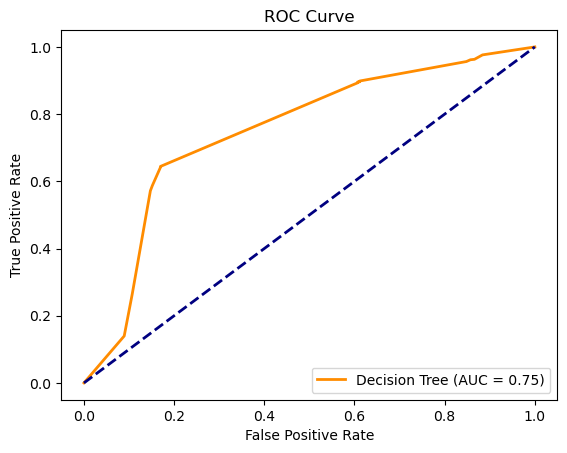

Best hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}


In [70]:
# ROC-AUC
if len(set(y_test)) > 1:  # Check if it's a binary classification problem
    roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_tfidf)[:, 1])
    print(f"AUC-ROC: {roc_auc:.2f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_tfidf)[:, 1])
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'Decision Tree (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

print(f"Best hyperparameters for Decision Tree: {best_params}")

In [80]:
pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 5.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X_train and y_train are your training features and labels
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create a Polynomial Regression pipeline
poly_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_reg', LinearRegression())
])

# Define the hyperparameters to tune
param_grid = {
    'poly_features__degree': [1, 2, 3],
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(poly_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model on the validation set
best_poly_reg = grid_search.best_estimator_
y_val_pred = best_poly_reg.predict(X_val)

# Print the mean squared error on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error on Validation Set:", mse_val)


Best Hyperparameters: {'poly_features__degree': 2}
Mean Squared Error on Validation Set: 0.06476359959909987


### Model Evaluation

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Assuming you have X_train and X_test as text data
# Assuming y_train and y_test are the corresponding labels

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



Confusion Matrix for Logistic Regression:
[[ 53 171]
 [ 17 742]]
Accuracy for Logistic Regression: 0.81
Precision for Logistic Regression: 0.81
Recall for Logistic Regression: 0.98
F1-Score for Logistic Regression: 0.89
AUC-ROC for Logistic Regression: 0.86


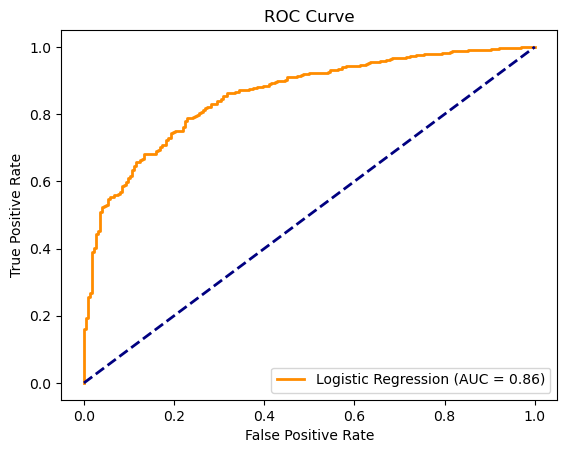


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.24      0.36       224
           1       0.81      0.98      0.89       759

    accuracy                           0.81       983
   macro avg       0.78      0.61      0.62       983
weighted avg       0.80      0.81      0.77       983


Confusion Matrix for Decision Tree:
[[119 105]
 [133 626]]
Accuracy for Decision Tree: 0.76
Precision for Decision Tree: 0.86
Recall for Decision Tree: 0.82
F1-Score for Decision Tree: 0.84
AUC-ROC for Decision Tree: 0.86


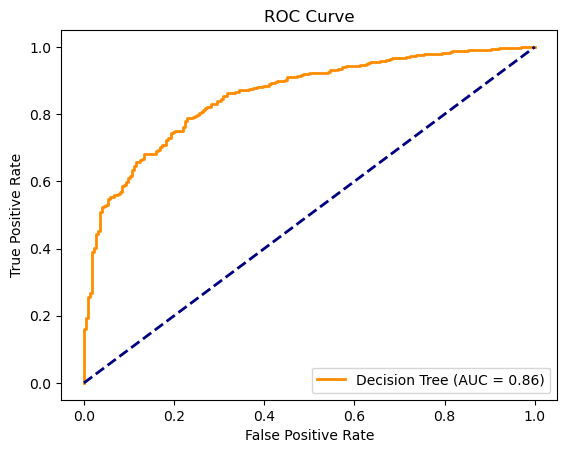


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.47      0.53      0.50       224
           1       0.86      0.82      0.84       759

    accuracy                           0.76       983
   macro avg       0.66      0.68      0.67       983
weighted avg       0.77      0.76      0.76       983


The best-performing model is: Logistic Regression


In [72]:
# Define models
logreg_model = LogisticRegression()
dt_model = DecisionTreeClassifier()

# Train the models
logreg_model.fit(X_train_tfidf, y_train)
dt_model.fit(X_train_tfidf, y_train)

# Predictions
logreg_pred = logreg_model.predict(X_test_tfidf)
dt_pred = dt_model.predict(X_test_tfidf)

# Evaluate each model
models = {
    'Logistic Regression': logreg_pred,
    'Decision Tree': dt_pred
}

for model_name, predictions in models.items():
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"\nConfusion Matrix for {model_name}:\n{cm}")

    # Accuracy
    acc = accuracy_score(y_test, predictions)
    print(f"Accuracy for {model_name}: {acc:.2f}")

    # Precision
    precision = precision_score(y_test, predictions)
    print(f"Precision for {model_name}: {precision:.2f}")

    # Recall
    recall = recall_score(y_test, predictions)
    print(f"Recall for {model_name}: {recall:.2f}")

    # F1-Score
    f1 = f1_score(y_test, predictions)
    print(f"F1-Score for {model_name}: {f1:.2f}")

    # ROC-AUC
    if len(set(y_test)) > 1:  # Check if it's a binary classification problem
        roc_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test_tfidf)[:, 1])
        print(f"AUC-ROC for {model_name}: {roc_auc:.2f}")

        # Plot ROC Curve
        fpr, tpr, _ = roc_curve(y_test, logreg_model.predict_proba(X_test_tfidf)[:, 1])
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

    # Classification Report
    report = classification_report(y_test, predictions)
    print(f"\nClassification Report for {model_name}:\n{report}")

    print("=" * 50)

# Identify the best-performing model based on a chosen metric (e.g., accuracy)
best_model_name = max(models, key=lambda k: accuracy_score(y_test, models[k]))
print(f"\nThe best-performing model is: {best_model_name}")

In [83]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')  # 'reg:squarederror' for regression

# Train the model
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model using MSE, RMSE, and R2 score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.04
R-squared (R2) Score: 1.00


### Model Deployment 

In [73]:
def model_deployment(model, text):

  input_preprocessed = preprocess_text(text)
  predicted_sentiment = model.predict([input_preprocessed])

  print("\nTest with Random Input:")
  print(f"Input Text: {text}")
  print(f"Predicted Sentiment: {'Positive' if predicted_sentiment[0] == 1 else 'Negative'}")
